In [1]:
import numpy as np
import sympy as sp
sp.init_printing()
from sympy import symbols, Function, diff, Matrix, sin, cos, lambdify
import scipy.integrate as integrate
from scipy.integrate import RK45
from scipy.interpolate import interp1d
from IPython.display import Math
from IPython.display import display


In [2]:
# Defining paramters and symbols
m_1, m_2, l, R =symbols("m_1 m_2 l R")
data = [(m_1, 34), (m_2, 4), (l, 9.96), (R, 9/100)] 
m_1_data = data[0]
m_2_data = data[1]
l_data =data[2]
R_data = data[3]
t = symbols('t')
k_1 = symbols('k_1')
k_2 = symbols('k_2')
kt_1 = symbols('kt_1')
kt_2 = symbols('kt_2')
# General coordinates
x = Function('x')(t)
phi = Function('phi')(t)
theta = Function('theta')(t)
r = Function('r')(t)    # gain

# display(solution[ddx])

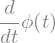

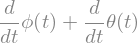

In [ ]:
# Moment of inertia
theta_1 = (1/12)*m_1*l**2
theta_2 = (1/2)*m_2*R**2

# Angular velocity
omega_1 = phi.diff(t)
omega_2 = phi.diff(t) + theta.diff(t)
omega_21 = theta.diff(t)

display(theta_1)
display(theta_2)
display(omega_1)
display(omega_2)

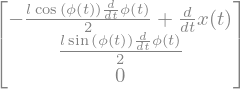

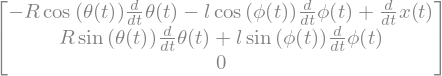

In [4]:
# Velocity
r_S01 = Matrix([(l/2)*sin(phi), (l/2)*cos(phi), 0])
v_S0 = Matrix([x.diff(t), 0, 0])
omega_v1 = Matrix([0, 0, omega_1])
v_v1 = v_S0 + omega_v1.cross(r_S01)
# print ("Velocity of S1:", v_v1)

r_S0C = Matrix([l*sin(phi), l*cos(phi), 0])
omega_v2 = Matrix([0, 0, omega_2]) #absolute omega_2 vector
v_C = v_S0 + omega_v1.cross(r_S0C)
omega_v21 = Matrix([0,0,omega_21])

r_CS2 = Matrix([R*sin(theta), R*cos(theta), 0])
v_v2 = v_C + omega_v21.cross(r_CS2)


# print ("Velocity of S2: ", v_v2)
# print("Magnitude of v_1 and v_2: ", v_1, "and ", v_2)

display(v_v1)
display(v_v2)


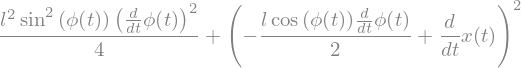

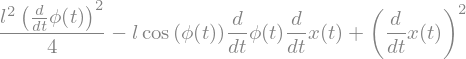

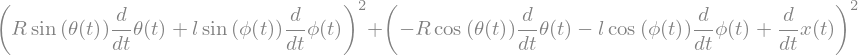

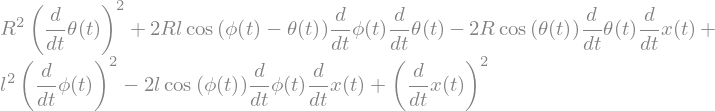

In [5]:
v_1 = v_v1.dot(v_v1)
display(v_1)
v_1s = v_1.simplify()
display(v_1s)
v_2 = v_v2.dot(v_v2)
display(v_2)
v_2s = v_2.simplify()
display(v_2s)

In [6]:
# Displacements for k
x_1 = x
x_2 = x + (3/4)*l*sin(phi)

# Angles for k_t
phi_1 = phi
phi_2 = theta

In [7]:
# Kinetic energy

T = (1/2)*(m_1*v_v1.dot(v_v1) + m_2*v_v2.dot(v_v2) + theta_1 * omega_1.dot(omega_1) + theta_2*omega_2.dot(omega_2))

# Potential energy 
U = (1/2)*(k_1*(r-x_1)**2 + k_2*(r-x_2)**2 + kt_1*phi_1**2 + kt_2*phi_2**2)

display(T)
display(U)

AttributeError: 'Derivative' object has no attribute 'dot'

In [ ]:
# Derivatives
dx = x.diff(t)
ddx = dx.diff(t)
dphi=phi.diff(t)
ddphi=dphi.diff(t)
dtheta = theta.diff(t)
ddtheta =dtheta.diff(t)
dT_dx = T.diff(x)
dT_dxd = T.diff(dx)
dT_dxdt = dT_dxd.diff(t)
dU_dx = U.diff(x)
dT_dphi = T.diff(phi)
dT_dphid = T.diff(dphi)
dT_dphidt = dT_dphid.diff(t)
dU_dphi = U.diff(phi)
dT_dtheta = T.diff(theta)
dT_dthetad = T.diff(dtheta)
dT_dthetadt = dT_dthetad.diff(t)
dU_dtheta = U.diff(theta)

In [ ]:
eq1 = dT_dxdt - dT_dx + dU_dx
eq2 = dT_dphidt - dT_dphi + dU_dphi
eq3 = dT_dthetadt - dT_dtheta + dU_dtheta


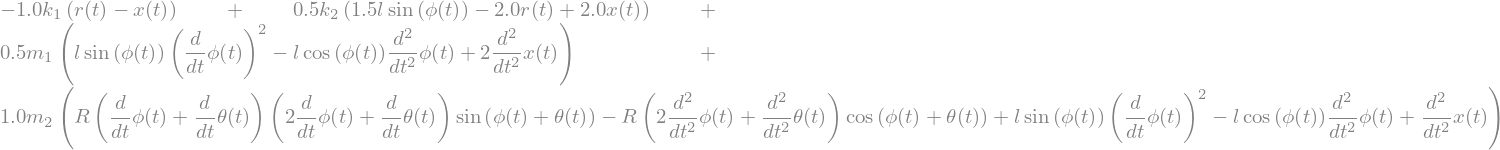

In [ ]:
# Simplifying equations
eq1_simplified = sp.simplify(eq1)
display(eq1_simplified)


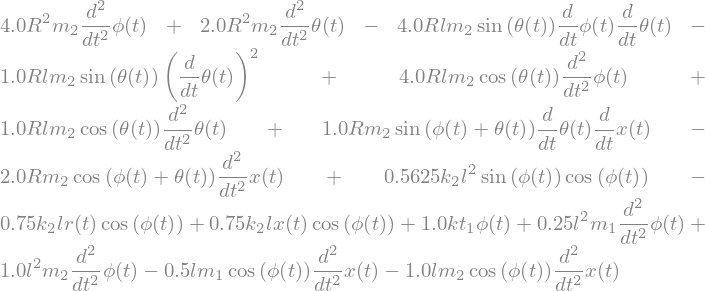

In [ ]:
eq2_simplified = sp.simplify(eq2)
display(eq2_simplified)

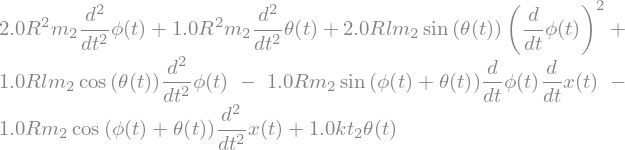

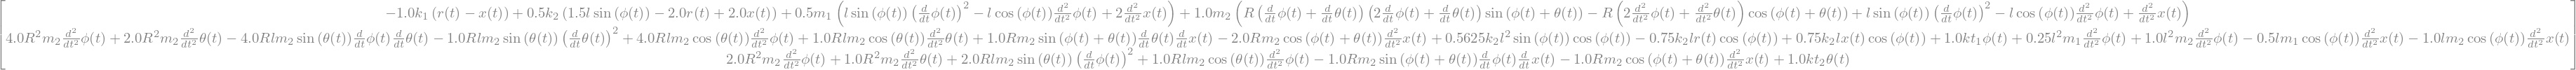

In [ ]:
eq3_simplified = sp.simplify(eq3)
eqs = sp.Matrix([eq1_simplified, eq2_simplified, eq3_simplified])
variables = sp.Matrix([ddx, ddphi, ddtheta, r])
display(eq3_simplified)

display(eqs)


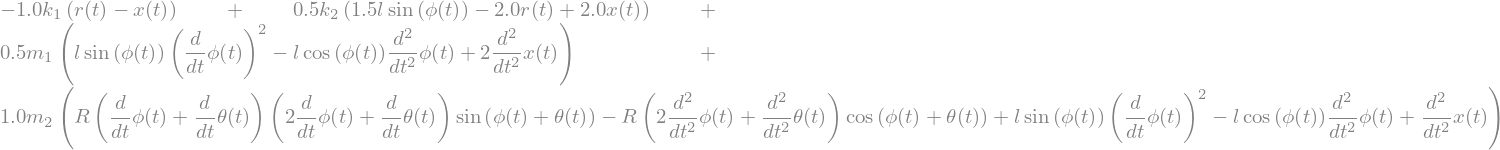

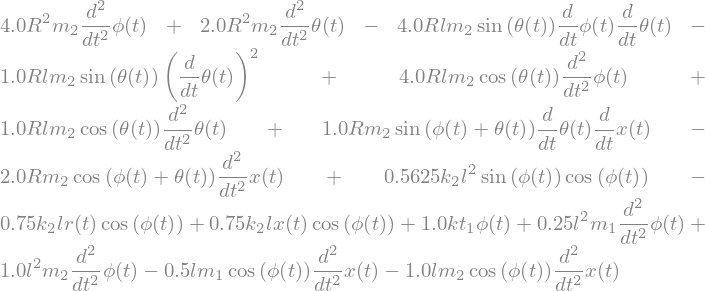

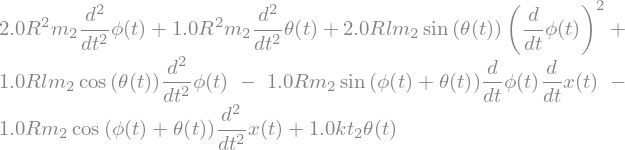

In [ ]:
display(eq1_simplified)
display(eq2_simplified)
display(eq3_simplified)
# display(eqs)

## Alternatív megoldás

Innentől jön a kevésbé elegáns megoldás, behelyettesítem azokat a numerikus értékeket, melyeket nem akarok lmfittel optimalizálni. Figyelem!!! Így nem kapom meg a mozgásegyenleteket szimbolikusan (amit be kéne illeszteni a szakdolgozatba), ezért ez csak félmegoldást hozhat a legjobb esetben is

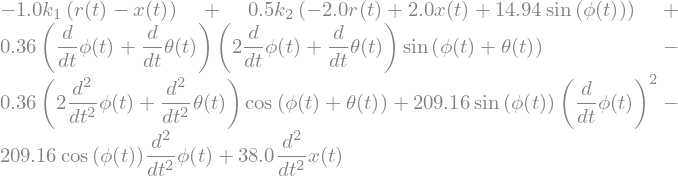

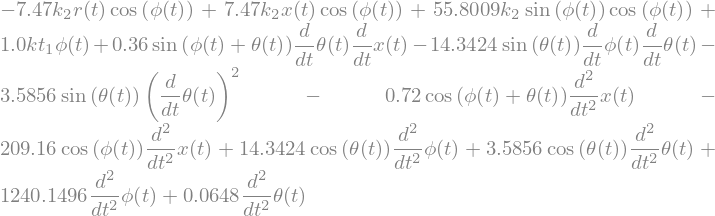

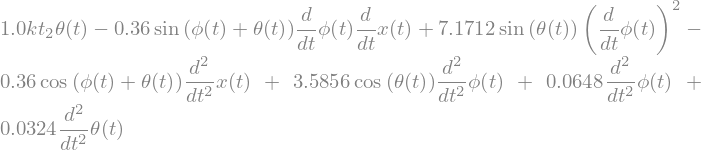

In [ ]:
# Substituting: m1,m2,l,R
substitutions = {m_1: m_1_data[1], m_2: m_2_data[1], l: l_data[1], R: R_data[1]}
eq1_subs = eq1_simplified.subs(substitutions)
eq2_subs = eq2_simplified.subs(substitutions)
eq3_subs = eq3_simplified.subs(substitutions)
display(eq1_subs)
display(eq2_subs)
display(eq3_subs)

eqs_subs = sp.Matrix([eq1_subs, eq2_subs, eq3_subs])
variables = sp.Matrix([ddx, ddphi, ddtheta, r]) # itt meg lehetne próbálni r kivételét



In [ ]:
# Solving the system
solution = sp.solve(eqs_subs, variables)
print("Solution of differential equation:", solution)


Solution of differential equation: {Derivative(phi(t), (t, 2)): -597600.0*k_1*x(t)*cos(phi(t) + theta(t))*cos(theta(t))/(74401200.0*cos(phi(t) + theta(t))**2 - 249988032.0*cos(phi(t) + theta(t))*cos(phi(t))*cos(theta(t)) + 656218584.0*cos(phi(t))**2 + 226179648.0*cos(theta(t))**2 - 706811400.0) + 3137400.0*k_1*x(t)*cos(phi(t))/(74401200.0*cos(phi(t) + theta(t))**2 - 249988032.0*cos(phi(t) + theta(t))*cos(phi(t))*cos(theta(t)) + 656218584.0*cos(phi(t))**2 + 226179648.0*cos(theta(t))**2 - 706811400.0) - 448200.0*k_2*x(t)*cos(phi(t) + theta(t))**2*cos(phi(t))/(74401200.0*cos(phi(t) + theta(t))**2 - 249988032.0*cos(phi(t) + theta(t))*cos(phi(t))*cos(theta(t)) + 656218584.0*cos(phi(t))**2 + 226179648.0*cos(theta(t))**2 - 706811400.0) - 597600.0*k_2*x(t)*cos(phi(t) + theta(t))*cos(theta(t))/(74401200.0*cos(phi(t) + theta(t))**2 - 249988032.0*cos(phi(t) + theta(t))*cos(phi(t))*cos(theta(t)) + 656218584.0*cos(phi(t))**2 + 226179648.0*cos(theta(t))**2 - 706811400.0) + 7395300.0*k_2*x(t)*cos(phi

In [ ]:
display(solution)

⎧                                                                              ↪
⎪                                                                              ↪
⎪ 2                                                                            ↪
⎨d                                                              597600.0⋅k₁⋅x( ↪
⎪───(φ(t)): - ──────────────────────────────────────────────────────────────── ↪
⎪  2                        2                                                  ↪
⎩dt           74401200.0⋅cos (φ(t) + θ(t)) - 249988032.0⋅cos(φ(t) + θ(t))⋅cos( ↪

↪                                                                              ↪
↪                                                                              ↪
↪                                                                              ↪
↪ t)⋅cos(φ(t) + θ(t))⋅cos(θ(t))                                                ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                          

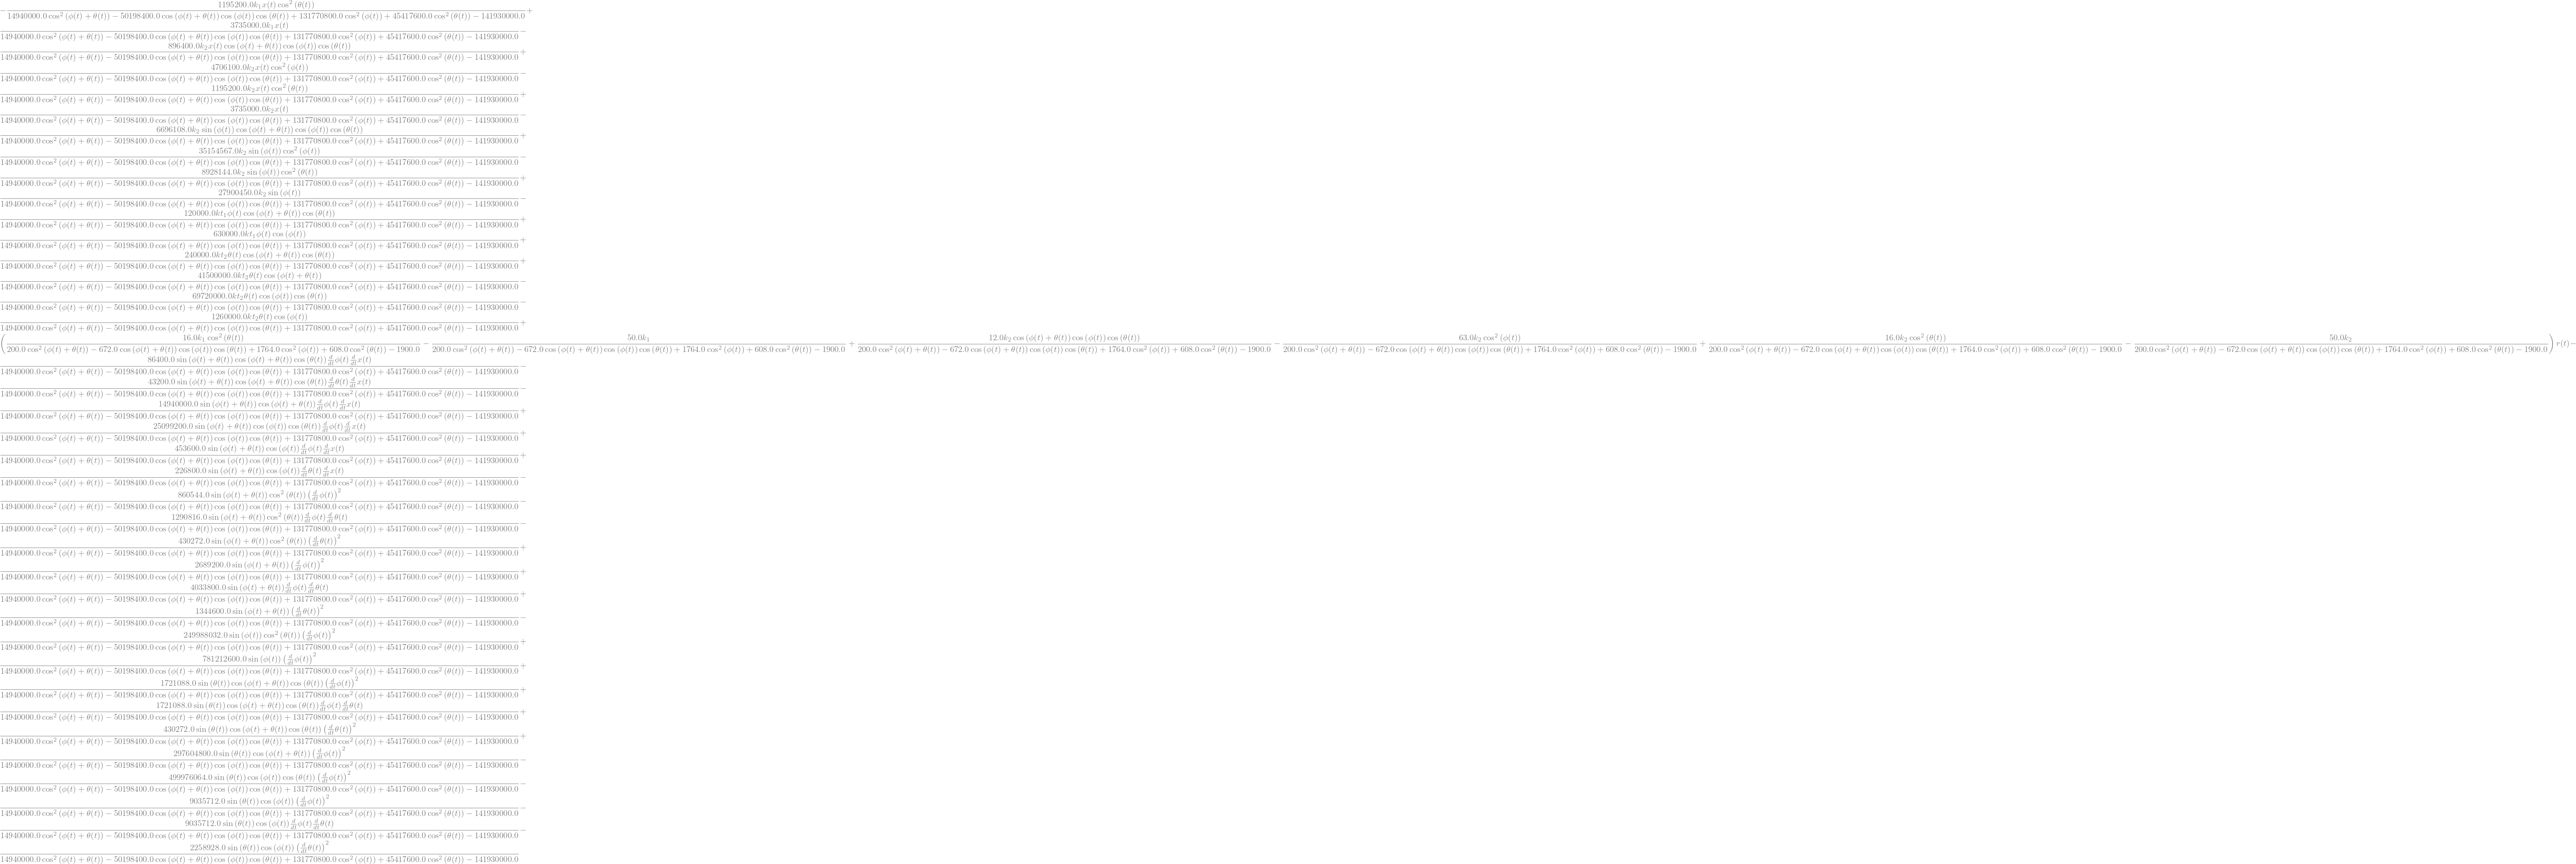

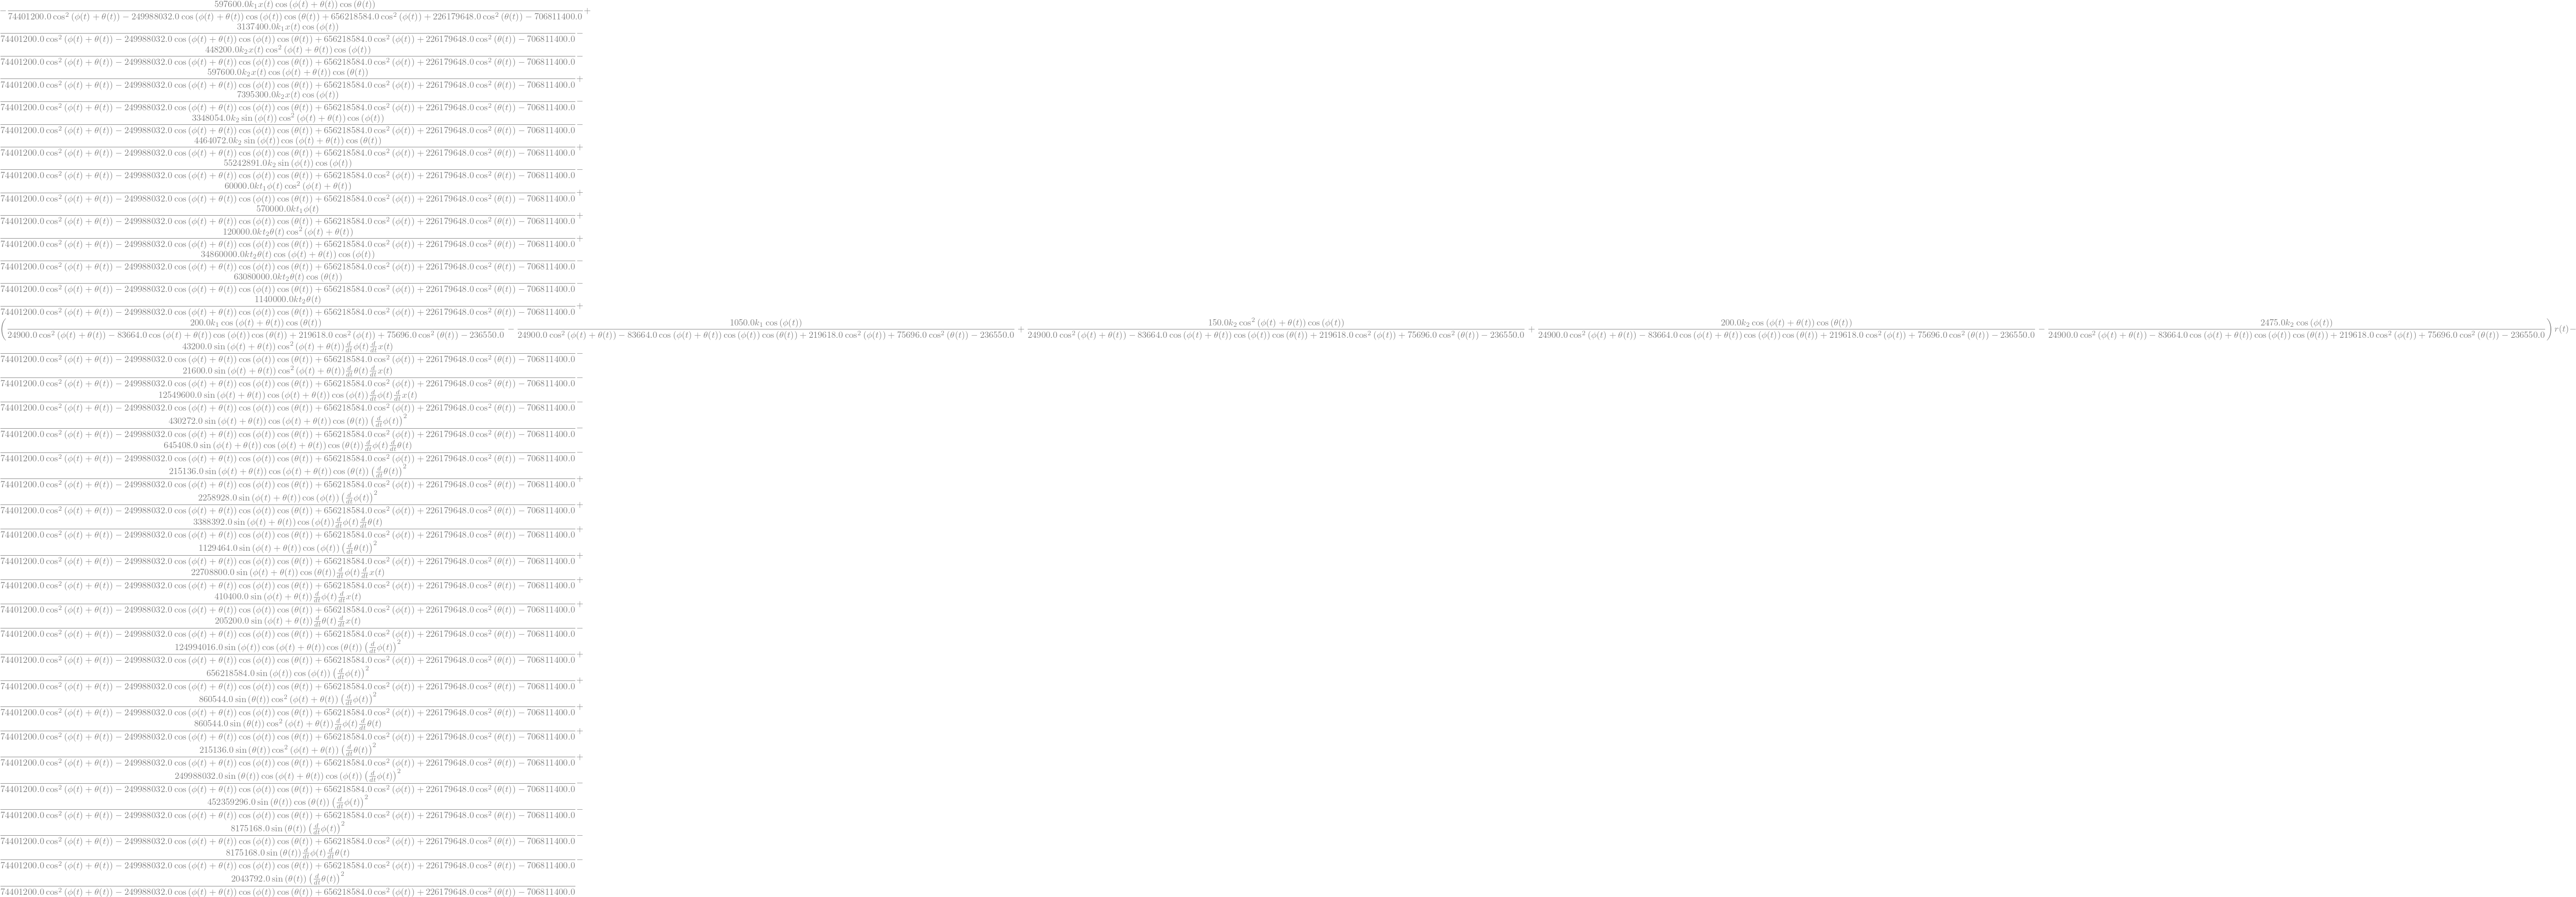

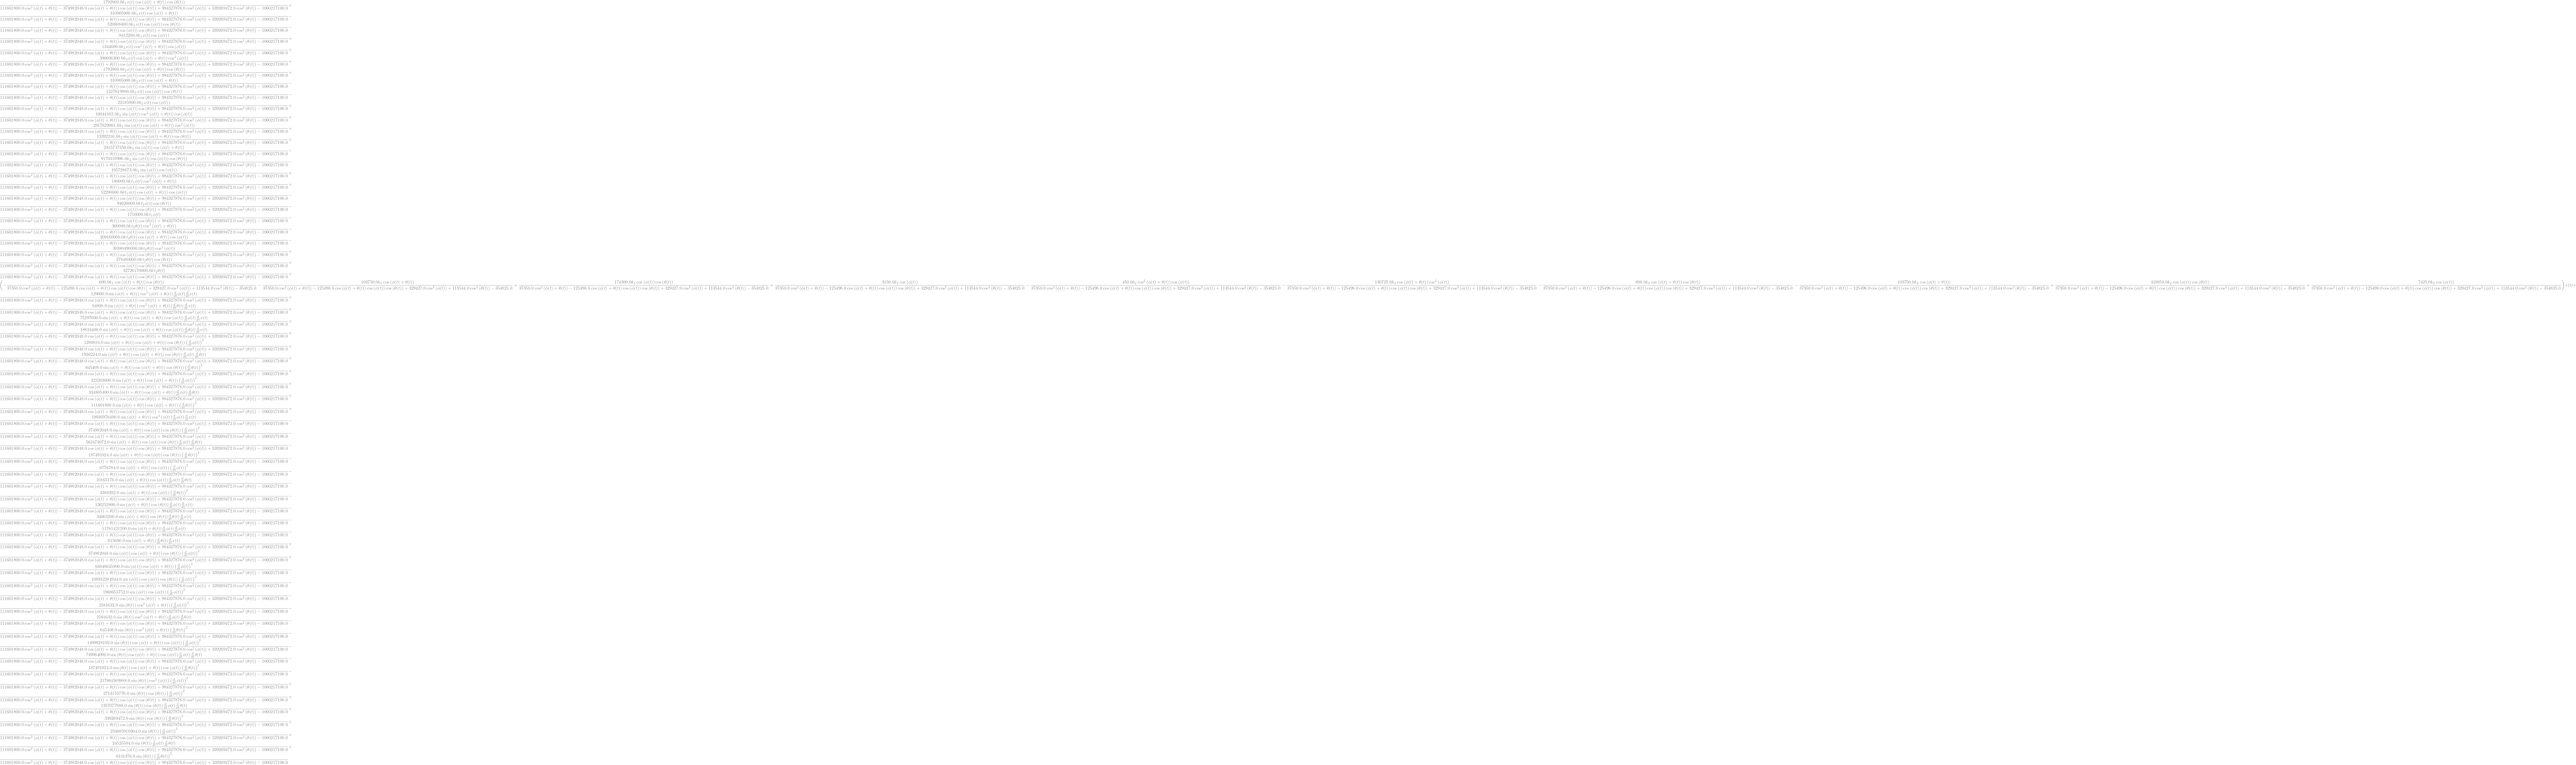

In [ ]:
# Conversion to numerical functions
ddx_num_expr = solution[ddx]
ddphi_num_expr = solution[ddphi]
ddtheta_num_expr = solution[ddtheta]

display(ddx_num_expr)
display(ddphi_num_expr)
display(ddtheta_num_expr)

In [ ]:
ddx_num_expr_simplified = sp.simplify(ddx_num_expr)
ddphi_num_expr_simplified = sp.simplify(ddphi_num_expr)
ddtheta_num_expr_simplified = sp.simplify(ddtheta_num_expr)

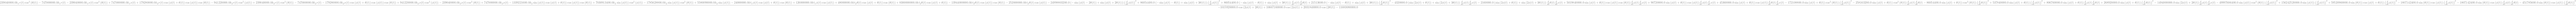

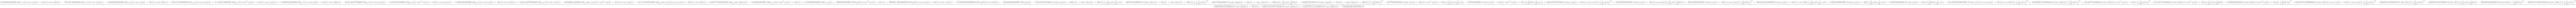

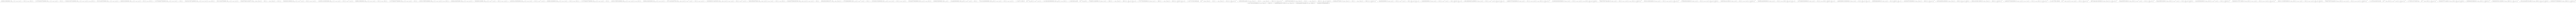

In [ ]:
display(ddx_num_expr_simplified)
display(ddphi_num_expr_simplified)
display(ddtheta_num_expr_simplified)

Megjegyzés: ezek a megoldások még simplify után is kicsit barátságtalanok, lmfit-nél nem tudom mennyire lesz ez ebben a formában használható, jobb lett volna a szimbolikus.

In [ ]:
# lambdify még nem biztos, hogy jó
ddx_num = lambdify((t, x, dx, phi, dphi, theta, dtheta, r, k_1, k_2, kt_1, kt_2), ddx_num_expr_simplified, 'numpy')
ddphi_num = lambdify((t, x, dx, phi, dphi, theta, dtheta, r, k_1, k_2, kt_1, kt_2), ddphi_num_expr_simplified, 'numpy')
ddtheta_num = lambdify((t, x, dx, phi, dphi, theta, dtheta, r, k_1, k_2, kt_1, kt_2), ddtheta_num_expr_simplified, 'numpy')
print ("ddx: ", ddx_num, "\nddphi: ", ddphi_num, "\nddtheta: ", ddtheta_num)


ddx:  <function _lambdifygenerated at 0x00000206963E4670> 
ddphi:  <function _lambdifygenerated at 0x00000206E818C040> 
ddtheta:  <function _lambdifygenerated at 0x000002068FAE2560>


In [ ]:
# Numerical values of acceleration and angular acceleration
results = [ddx_num, ddphi_num, ddtheta_num]


# Innentől a feladat továbbvitele, az egyenletmegoldás problémái efelett

### Displacement, velocity, angular displacement, angular velocity

In [ ]:
import os
import sys 
sys.path.append(r'C:\Users\emmaf\Documents\7. félév\SZAKDOLGOZAT\osd_dummy_modeling')
import matplotlib.pyplot as plt
import function_files.krc_reader as krc_reader
import function_files.filterSAEJ211 as filterSAEJ211
import numpy as np
from lmfit import Parameters, Minimizer
import model2_mdof_multibody.equation_solver_3DoF as solv
import function_files.data_saver as data_saver 

In [ ]:
# path_EU = os.path.join( os.path.dirname( os.path.abspath('') ), 'Dataset', 'EU2' )
# path_US = os.path.join( os.path.dirname( os.path.abspath('') ), 'Dataset', 'US' )
base_path = r'C:\Users\emmaf\Documents\7. félév\SZAKDOLGOZAT\osd_dummy_modeling\Dataset'
# path_EU = os.path.join( os.path.abspath(''), 'Dataset', 'EU2' )
path_EU = os.path.join(base_path, 'EU2')
path_US = os.path.join(base_path, 'US')
# path_US = os.path.join( os.path.abspath(''), 'Dataset', 'US' )

# sim_repl_lib_paths = [ path_US  ]
sim_repl_lib_paths = [ path_EU, path_US  ]

krc_data_reader = krc_reader.KeyResultCurveDataReader( sim_repl_lib_paths )
krc_data_reader.load_replications_results( moving_average_win_len=10 )
krc_data_reader.get_channels_with_missing_data()

[('EU2', 'SO000', '11CHST0000H3DSX0'),
 ('EU2', 'SO001', '11CHST0000H3DSX0'),
 ('EU2', 'SO002', '11CHST0000H3DSX0'),
 ('EU2', 'SO003', '11CHST0000H3DSX0'),
 ('EU2', 'SO004', '11CHST0000H3DSX0'),
 ('EU2', 'SO005', '11CHST0000H3DSX0'),
 ('EU2', 'SO006', '11CHST0000H3DSX0'),
 ('EU2', 'SO007', '11CHST0000H3DSX0'),
 ('EU2', 'SO008', '11CHST0000H3DSX0'),
 ('EU2', 'SO009', '11CHST0000H3DSX0'),
 ('EU2', 'SO010', '11CHST0000H3DSX0'),
 ('EU2', 'SO011', '11CHST0000H3DSX0'),
 ('EU2', 'SO012', '11CHST0000H3DSX0'),
 ('EU2', 'SO013', '11CHST0000H3DSX0'),
 ('EU2', 'SO014', '11CHST0000H3DSX0'),
 ('EU2', 'SO015', '11CHST0000H3DSX0'),
 ('EU2', 'SO016', '11CHST0000H3DSX0'),
 ('EU2', 'SO017', '11CHST0000H3DSX0'),
 ('EU2', 'SO018', '11CHST0000H3DSX0'),
 ('EU2', 'SO019', '11CHST0000H3DSX0'),
 ('EU2', 'SO020', '11CHST0000H3DSX0'),
 ('EU2', 'SO021', '11CHST0000H3DSX0'),
 ('EU2', 'SO022', '11CHST0000H3DSX0'),
 ('EU2', 'SO023', '11CHST0000H3DSX0'),
 ('EU2', 'SO024', '11CHST0000H3DSX0'),
 ('EU2', 'SO025', '11CHST

In [ ]:
krc_data_reader.remove_channels_from_all_replications( [ '11CHST0000H3DSX0' ] )
krc_data_reader.get_channels_with_missing_data()

[('EU2', 'SO095', '10SLEDFRMI00ACX0'),
 ('EU2', 'SO095', '11CHST0000H3ACX0'),
 ('EU2', 'SO095', '11CHST0000H3ACY0'),
 ('EU2', 'SO095', '11CHST0000H3ACZ0'),
 ('EU2', 'SO095', '11FEMRLE00H3FOX0'),
 ('EU2', 'SO095', '11FEMRLE00H3FOY0'),
 ('EU2', 'SO095', '11FEMRLE00H3FOZ0'),
 ('EU2', 'SO095', '11FEMRRI00H3FOX0'),
 ('EU2', 'SO095', '11FEMRRI00H3FOY0'),
 ('EU2', 'SO095', '11FEMRRI00H3FOZ0'),
 ('EU2', 'SO095', '11HEAD0000H3ACX0'),
 ('EU2', 'SO095', '11HEAD0000H3ACY0'),
 ('EU2', 'SO095', '11HEAD0000H3ACZ0'),
 ('EU2', 'SO095', '11LUSP0000H3FOX0'),
 ('EU2', 'SO095', '11LUSP0000H3FOY0'),
 ('EU2', 'SO095', '11LUSP0000H3FOZ0'),
 ('EU2', 'SO095', '11LUSP0000H3MOX0'),
 ('EU2', 'SO095', '11LUSP0000H3MOY0'),
 ('EU2', 'SO095', '11LUSP0000H3MOZ0'),
 ('EU2', 'SO095', '11NECKUP00H3FOX0'),
 ('EU2', 'SO095', '11NECKUP00H3FOY0'),
 ('EU2', 'SO095', '11NECKUP00H3FOZ0'),
 ('EU2', 'SO095', '11NECKUP00H3MOX0'),
 ('EU2', 'SO095', '11NECKUP00H3MOY0'),
 ('EU2', 'SO095', '11NECKUP00H3MOZ0'),
 ('EU2', 'SO095', '11PELV

In [ ]:
krc_data_reader.remove_replications( [ ('US', 'SO000'), ('US', 'SO019'), ('US', 'SO095'), ('EU2', 'SO095') ] ) #('US', 'SO024'), ('US', 'SO056'),
krc_data_reader.get_channels_with_missing_data()

In [ ]:
channels_in_data = krc_data_reader.get_available_channels()
print( channels_in_data )

{'11FEMRRI00H3FOZ0', '11FEMRLE00H3FOX0', '11LUSP0000H3FOZ0', '11FEMRRI00H3FOY0', '11PELV0000H3ACX0', '11NECKUP00H3MOX0', '11HEAD0000H3ACX0', '11HEAD0000H3ACY0', '11CHST0000H3ACZ0', '11NECKUP00H3FOX0', '11FEMRLE00H3FOZ0', '11SEBE0000B4FOR0', '11FEMRLE00H3FOY0', '11LUSP0000H3MOZ0', '11LUSP0000H3MOX0', '11SEBE0000B6FOR0', '11LUSP0000H3FOY0', '11NECKUP00H3MOZ0', '11SEBE0000B3FOR0', '11CHST0000H3ACY0', '11NECKUP00H3FOY0', '11NECKUP00H3MOY0', '11SEBE0000B5FOR0', '11LUSP0000H3MOY0', '11LUSP0000H3FOX0', '11HEAD0000H3ACZ0', '11PELV0000H3ACY0', '11CHST0000H3ACX0', '11PELV0000H3ACZ0', '11FEMRRI00H3FOX0', '10SLEDFRMI00ACX0', '11NECKUP00H3FOZ0'}


In [ ]:
krc_data_reader.get_available_replications()

[('EU2', 'SO000'),
 ('EU2', 'SO001'),
 ('US', 'SO001'),
 ('EU2', 'SO002'),
 ('US', 'SO002'),
 ('EU2', 'SO003'),
 ('US', 'SO003'),
 ('EU2', 'SO004'),
 ('US', 'SO004'),
 ('EU2', 'SO005'),
 ('US', 'SO005'),
 ('EU2', 'SO006'),
 ('US', 'SO006'),
 ('EU2', 'SO007'),
 ('US', 'SO007'),
 ('EU2', 'SO008'),
 ('US', 'SO008'),
 ('EU2', 'SO009'),
 ('US', 'SO009'),
 ('EU2', 'SO010'),
 ('US', 'SO010'),
 ('EU2', 'SO011'),
 ('US', 'SO011'),
 ('EU2', 'SO012'),
 ('US', 'SO012'),
 ('EU2', 'SO013'),
 ('US', 'SO013'),
 ('EU2', 'SO014'),
 ('US', 'SO014'),
 ('EU2', 'SO015'),
 ('US', 'SO015'),
 ('EU2', 'SO016'),
 ('US', 'SO016'),
 ('EU2', 'SO017'),
 ('US', 'SO017'),
 ('EU2', 'SO018'),
 ('US', 'SO018'),
 ('EU2', 'SO019'),
 ('EU2', 'SO020'),
 ('US', 'SO020'),
 ('EU2', 'SO021'),
 ('US', 'SO021'),
 ('EU2', 'SO022'),
 ('US', 'SO022'),
 ('EU2', 'SO023'),
 ('US', 'SO023'),
 ('EU2', 'SO024'),
 ('US', 'SO024'),
 ('EU2', 'SO025'),
 ('US', 'SO025'),
 ('EU2', 'SO026'),
 ('US', 'SO026'),
 ('EU2', 'SO027'),
 ('US', 'SO027'),


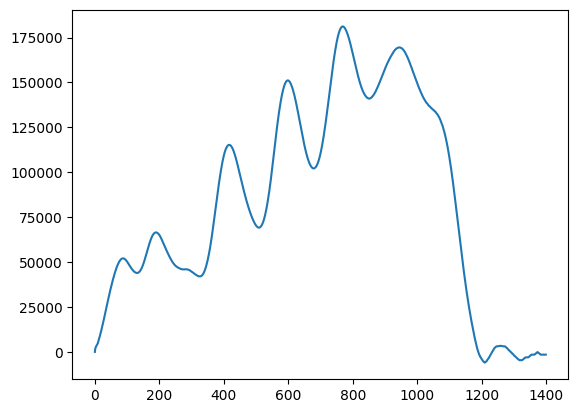

In [ ]:
sing_rep_res = krc_data_reader.get_single_replication_results( ('EU2', 'SO066') )
plt.plot( sing_rep_res['10SLEDFRMI00ACX0'] )

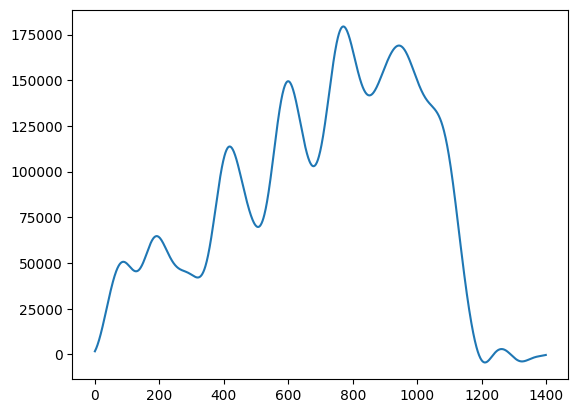

In [ ]:
# Filter
data = sing_rep_res['10SLEDFRMI00ACX0']
# data = data
filtered_data = filterSAEJ211.filterSAEJ211(data, 6, 0.001)
# time = np.linspace(0, 0.00014, 1400)
plt.plot(filtered_data)

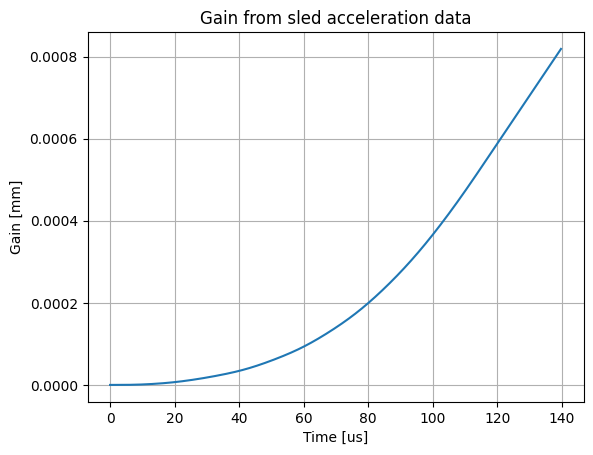

In [ ]:
# Given acceleration
acceleration_data = np.array(filtered_data) # mm/s^2
sled_acceleration_data = acceleration_data/10**12 # mm/us^2
time = np.linspace(0, 0.00014*10**6, 1400) # microsec
# Initial conditions
x_0 = 0
v_0 =0
y0 = [x_0, v_0]
max_step = 0.0000001*10**6
# Sled displacement
gain, t_values = solv.sled_acceleration_to_displacement(sled_acceleration_data, time, y0, max_step)
    
# Plotting the results
plt.figure()
plt.plot(t_values, gain)
plt.xlabel('Time [us]')
plt.ylabel('Gain [mm]')
plt.title("Gain from sled acceleration data")
plt.grid() # kikapcsolható
plt.show()

In [ ]:
# Defining paramters and symbols
m_1, m_2, l, R =symbols("m_1 m_2 l R")
data = [(m_1, 34), (m_2, 4), (l, 9.96), (R, 9/100)] 
m_1_data = data[0]
m_2_data = data[1]
l_data =data[2]
R_data = data[3]
gain = gain*10**-3 # mm to m

# Inital guesses for k1, k2, kt1, kt2
k1_initial = 1   
k2_initial = 2
kt1_initial = 20
kt2_initial = 30
y0 = [0,0]
max_step = 0.0000001*10**6

x_computed, dx_computed = solv.num_solver(ddx_num, gain, t_values, y0, max_step,
                                          k1_initial, k2_initial)

ddx_sol = solv.results_substituted(ddx_num, gain, t_values, y0, max_step,
                                          k1_initial, k2_initial)

plt.plot(ddx_sol)

TypeError: _lambdifygenerated() missing 6 required positional arguments: '_Dummy_107', '_Dummy_111', 'k_1', 'k_2', 'kt_1', and 'kt_2'

# Innentől látható kikommentelve az eredeti megoldás, ami sajnos nem futott le.

In [ ]:
# # Solving the system
# solution = sp.solve(eqs, variables)
# print("Solution of differential equation:", solution)

# Substituting numerical values for constants
# solution_with_values = {key: value.subs(data).evalf() for key, 
#                         value in solution.items()}

# # Conversion to numerical functions
# ddx_num_expr = solution_with_values[ddx]
# ddphi_num_expr = solution_with_values[ddphi]
# ddtheta_num_expr = solution_with_values[ddtheta]
# # lambdify még nem biztos, hogy jó
# ddx_num = lambdify((t, x, dx, phi, dphi, theta, dtheta, r, k_1, k_2, kt_1, kt_2), ddx_num_expr, 'numpy')
# ddphi_num = lambdify((t, x, dx, phi, dphi, theta, dtheta, r, k_1, k_2, kt_1, kt_2), ddphi_num_expr, 'numpy')
# ddtheta_num = lambdify((t, x, dx, phi, dphi, theta, dtheta, r, k_1, k_2, kt_1, kt_2), ddtheta_num_expr, 'numpy')
# print ("ddx: ", ddx_num, "\nddphi: ", ddphi_num, "\nddtheta: ", ddtheta_num)

# # Numerical values of acceleration and angular acceleration
# results = [ddx_num, ddphi_num, ddtheta_num]


KeyboardInterrupt: 